# Klebsiella analysis

This notebook contains a more detailed analysis of the antibiotic resistance profile, country level data and other variables for the _Klebsiella pneumoniae_ taxonomic group in the dataset

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

sns.set_theme(style="darkgrid")

# Import the dataset
df = pd.read_csv("../data/20240804_clean_data.csv.xz", compression="xz")
df.head()

,scientific_name,contig_acc,biosample_acc,target_acc,element_symbol,protein_acc,type,class,subclass,taxgroup_name,isolation_source,geo_loc_name,epi_type,host,year,country
0,Salmonella enterica,AAFUZC010000051.1,SAMN03098832,PDT000041084.2,blaDHA,NaN,AMR,BETA-LACTAM,CEPHALOSPORIN,Salmonella enterica,Unknown,USA,clinical,Unknown,NaN,USA
1,Salmonella enterica,AAFUZC010000051.1,SAMN03098832,PDT000041084.2,ble,EBK1426116.1,AMR,BLEOMYCIN,BLEOMYCIN,Salmonella enterica,Unknown,USA,clinical,Unknown,NaN,USA
2,Salmonella enterica,AAFUZC010000051.1,SAMN03098832,PDT000041084.2,blaNDM-1,EBK1426117.1,AMR,BETA-LACTAM,CARBAPENEM,Salmonella enterica,Unknown,USA,clinical,Unknown,NaN,USA
3,Salmonella enterica,AAFUZC010000073.1,SAMN03098832,PDT000041084.2,blaNDM-1,EBK1426163.1,AMR,BETA-LACTAM,CARBAPENEM,Salmonella enterica,Unknown,USA,clinical,Unknown,NaN,USA
4,Salmonella enterica,AAFUZC010000073.1,SAMN03098832,PDT000041084.2,ble,EBK1426164.1,AMR,BLEOMYCIN,BLEOMYCIN,Salmonella enterica,Unknown,USA,clinical,Unknown,NaN,USA


In [6]:
# Filter to subset only Klebsiella
df_klebsiella = df[df["taxgroup_name"] == "Klebsiella pneumoniae"].copy()
df_klebsiella.drop_duplicates(subset=["taxgroup_name", "class", "biosample_acc"], inplace=True)
df_klebsiella.head()

,scientific_name,contig_acc,biosample_acc,target_acc,element_symbol,protein_acc,type,class,subclass,taxgroup_name,isolation_source,geo_loc_name,epi_type,host,year,country
4089,Klebsiella pneumoniae,ABEXAP030000050.1,SAMN25338514,PDT001233313.3,blaNDM-1,EMQ1055868.1,AMR,BETA-LACTAM,CARBAPENEM,Klebsiella pneumoniae,Unknown,USA,clinical,Homo sapiens,2021.0,USA
4090,Klebsiella pneumoniae,ABEXAP030000050.1,SAMN25338514,PDT001233313.3,ble,EMQ1055869.1,AMR,BLEOMYCIN,BLEOMYCIN,Klebsiella pneumoniae,Unknown,USA,clinical,Homo sapiens,2021.0,USA
4093,Klebsiella pneumoniae,ABEXAS030000079.1,SAMN25279865,PDT001231509.3,blaNDM-5,EMJ5616728.1,AMR,BETA-LACTAM,CARBAPENEM,Klebsiella pneumoniae,"ulcer, decubitius",USA,clinical,Homo sapiens,2021.0,USA
4094,Klebsiella pneumoniae,ABEXAS030000079.1,SAMN25279865,PDT001231509.3,ble,EMJ5616729.1,AMR,BLEOMYCIN,BLEOMYCIN,Klebsiella pneumoniae,"ulcer, decubitius",USA,clinical,Homo sapiens,2021.0,USA
4097,Klebsiella pneumoniae,ABEXAT030000060.1,SAMN25279857,PDT001231496.3,blaNDM-5,EMN5214592.1,AMR,BETA-LACTAM,CARBAPENEM,Klebsiella pneumoniae,urine,USA,clinical,Homo sapiens,2021.0,USA


# Country level distribution

We can look at the distribution of the isolates by country

<Axes: xlabel='count', ylabel='country'>

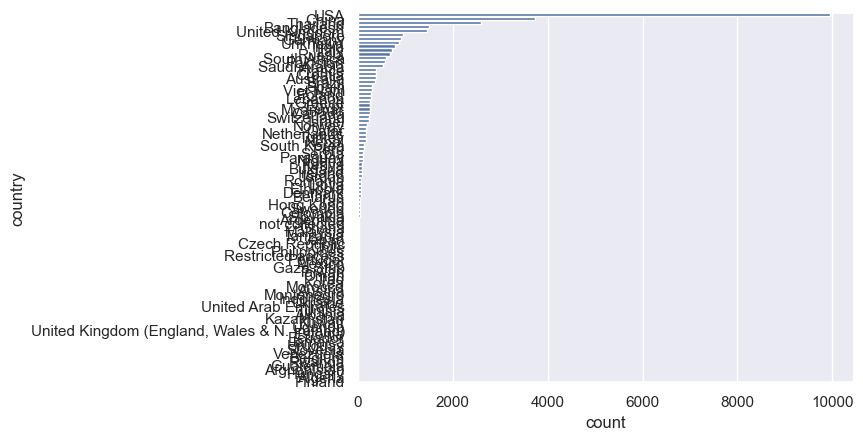

In [19]:
sns.countplot(df_klebsiella, y="country", 
              order=df_klebsiella["country"].value_counts().index
              )

It is difficult to look at something, so let's try filtering with countries with at least 20 isolates

<Axes: xlabel='count', ylabel='country'>

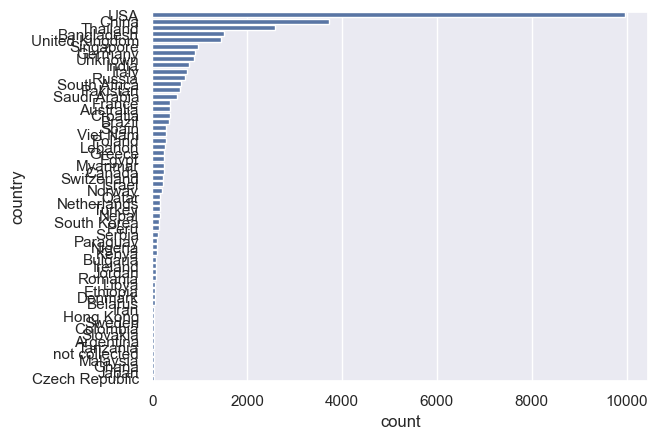

In [25]:
filtered_df_kleb = df_klebsiella.groupby("country").filter(lambda x: len(x) > 19).copy()

sns.countplot(filtered_df_kleb, y="country", 
              order=filtered_df_kleb["country"].value_counts().index
              )

As expected, USA and China are the countries with the highest number of isolates on the dataset. 

